In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt 

# import functions and classes from Sklearn.py
import sys

sys.path.append('../../full-stack-data-scientist/ch5_python/python_appendix')  

In [86]:
os.chdir('/Users/rachelzeng/full-stack-data-scientist/ch6_ml/Random_Forest')

In [106]:
import os 

print(sys.path)
from Sklearn_tutorial12 import data_loader, target_transformation, Attribute_pip

import pandas as pd
os.chdir('../../ch6_ml')
Data_Path =os.path.join ('Data')
data_name = 'COVID_19.csv'
COVID = data_loader (data_path=Data_Path, data= data_name)


['/Users/rachelzeng/full-stack-data-scientist/ch6_ml/Random_Forest', '/Users/rachelzeng/.vscode/extensions/ms-python.python-2020.8.109390/pythonFiles/vscode_datascience_helpers/../.does-not-exist', '/Users/rachelzeng/.vscode/extensions/ms-python.python-2020.8.109390/pythonFiles', '/Users/rachelzeng/.vscode/extensions/ms-python.python-2020.8.109390/pythonFiles/lib/python', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/rachelzeng/Library/Python/3.6/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/extensions', '/Users/rachelzeng/.ipython', '/Users/rachelzeng/full-stack-data-scientist/ch5_python/python_appendix', '/Users/rachelzeng/full-stack-data-scientist/ch5_python

In [107]:
COVID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
ID                  200 non-null int64
Age                 200 non-null int64
Sex                 200 non-null object
Residency Status    200 non-null object
Travel?             199 non-null object
Close contact       199 non-null object
Dry Cough           199 non-null object
Temperature         199 non-null object
COVID_19?           200 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 12.8+ KB


In [108]:
print(COVID.head())

ID  Age Sex Residency Status Travel? Close contact Dry Cough  Temperature  \
0   1   44   M     Non-Canadian    True          True     False   37.4645571   
1   2   16   M     Non-Canadian    True          True      True  39.28288412   
2   3   36   M         Canadian    True         False      True  35.83942596   
3   4   53   F     Non-Canadian   False          True      True  38.11737988   
4   5   11   F         Canadian   False         False      True  36.93367767   

   COVID_19?  
0       True  
1       True  
2      False  
3       True  
4      False  


In [109]:

target_name = 'COVID_19?'
Irrelavent = COVID.pop ('ID')
target = COVID.pop (target_name)

COVID[['Travel?', 'Close contact', 'Dry Cough']] = COVID[['Travel?', 'Close contact', 'Dry Cough']].astype('bool')

COVID[['Residency Status',  'Sex']] = COVID[['Residency Status', 'Sex']].astype('category')


In [110]:
# Split Training and Testing data
from sklearn.model_selection import train_test_split

Train_Data, Test_Data, target_train, target_test  = train_test_split(COVID,target,test_size=0.2, random_state= 1,stratify=target)
Train_Data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 18 to 90
Data columns (total 7 columns):
Age                 160 non-null int64
Sex                 160 non-null category
Residency Status    160 non-null category
Travel?             160 non-null bool
Close contact       160 non-null bool
Dry Cough           160 non-null bool
Temperature         159 non-null object
dtypes: bool(3), category(2), int64(1), object(1)
memory usage: 4.7+ KB


In [111]:
# Preprocessing 

null_train = Train_Data.loc[pd.isnull(Train_Data).any(axis = 1),:].index.values
Train_Data = Train_Data.drop(null_train)
null_test = Test_Data.loc[pd.isnull(Test_Data).any(axis = 1),:].index.values
Test_Data = Test_Data.drop(null_test)
target_train= target_train.drop(null_train)
target_test = target_test.drop(null_test)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


Trained_transformed = Attribute_pip (Train_Data)
Tested_transformed = Attribute_pip (Test_Data)

target_train = target_transformation (target_train)
target_test = target_transformation (target_test)
print(target_train)
print(Trained_transformed)


[0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1
 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0
 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1
 0 1 1 1 1 0 0 0 0 1 0]
  (0, 0)	-0.4824169816506108
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 9)	1.0
  (0, 138)	1.0
  (1, 0)	1.4208056978330748
  (1, 1)	1.0
  (1, 4)	1.0
  (1, 6)	1.0
  (1, 8)	1.0
  (1, 9)	1.0
  (1, 154)	1.0
  (2, 0)	0.4470638618181659
  (2, 1)	1.0
  (2, 4)	1.0
  (2, 6)	1.0
  (2, 8)	1.0
  (2, 10)	1.0
  (2, 84)	1.0
  (3, 0)	1.5093276829253393
  (3, 1)	1.0
  (3, 4)	1.0
  (3, 5)	1.0
  :	:
  (155, 5)	1.0
  (155, 8)	1.0
  (155, 10)	1.0
  (155, 50)	1.0
  (156, 0)	-1.1905928623887263
  (156, 2)	1.0
  (156, 3)	1.0
  (156, 6)	1.0
  (156, 7)	1.0
  (156, 9)	1.0
  (156, 20)	1.0
  (157, 0)	-1.3676368325732553
  (157, 1)	1.0
  (157, 3)	1.0
  (157, 6)	1.0
  (157, 8)	1.0
  (

In [112]:
col_name = ['Age','Temperature', 'Sex-M', 'Sex-F', 'Residency Status-C ','Residency Status-NC', 'Travel Y', 'Travel N', 'Close contact Y', 'Close contact N' ,'Dry Cough-Y','Dry Cough- N']

In [113]:

# Decision Tree 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
Single_tree = DecisionTreeClassifier(criterion = 'entropy',random_state= 1).fit(Trained_transformed,target_train)
print(Single_tree)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [114]:

from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
predict = Single_tree.predict(Tested_transformed)
print('precision_ Score on the test data: {0:.2f} %'.format(100 *((precision_score)(y_true= target_test, y_pred=predict))))
print(classification_report(target_test, predict))


ValueError: Number of features of the model must match the input. Model n_features is 170 and input n_features is 51 

In [115]:

tree.plot_tree(Single_tree, filled= True)
os.chdir('/Users/rachelzeng/dsbook/fig')
import graphviz # pip install graphviz (brew install graphviz on MAC solves the problem of system path)
graph_data = tree.export_graphviz(Single_tree, out_file=None, 
                    feature_names=col_name, 
                     class_names=['infected', 'noninfected'] ,
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(graph_data) 
graph.format = 'png'
graph.render("COVID_19_DT_py", view = 'True') 


ValueError: Length of feature_names, 12 does not match number of features, 170

In [116]:
# Feature Importantce
print(*zip(col_name ,Single_tree.feature_importances_))

('Age', 0.320184471509396) ('Temperature', 0.017350602666184795) ('Sex-M', 0.03289702665564104) ('Sex-F', 0.01568372734472599) ('Residency Status-C ', 0.03035939371657841) ('Residency Status-NC', 0.027650996140468318) ('Travel Y', 0.01322519754280546) ('Travel N', 0.0) ('Close contact Y', 0.04435048637477724) ('Close contact N', 0.0) ('Dry Cough-Y', 0.10563783755981866) ('Dry Cough- N', 0.0)


In [117]:

from sklearn.metrics import accuracy_score
predict_train = Single_tree.predict(Trained_transformed)
print('accuracy_ Score on the train data: {0:.2f} %'.format(100 *((accuracy_score)(y_true= target_train, y_pred=predict_train ))))

predict_test = Single_tree.predict(Tested_transformed)
print('accuracy_ Score on the test data: {0:.2f} %'.format(100 *((accuracy_score)(y_true= target_test, y_pred=predict_test ))))



accuracy_ Score on the train data: 100.00 %


ValueError: Number of features of the model must match the input. Model n_features is 170 and input n_features is 51 

In [118]:

# Pre-pruning
Single_tree_pruned = DecisionTreeClassifier(criterion = 'entropy', random_state= 1, min_samples_split=15, max_depth=4).fit(Trained_transformed,target_train)
score_prun = Single_tree_pruned.score(Tested_transformed,target_test )
print('accuracy_ Score of pre-pruned Tree on the test data: {0:.2f} %'.format(100 *score_prun))

# New graph:
tree.plot_tree(Single_tree_pruned, filled= True)

graph_data = tree.export_graphviz(Single_tree_pruned, out_file=None, 
                    feature_names=col_name, 
                     class_names=['infected', 'noninfected'] ,
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(graph_data) 
graph.format = 'png'
graph.render("COVID_19_DTpruned_py", view=True) 

ValueError: Number of features of the model must match the input. Model n_features is 170 and input n_features is 51 

In [119]:
print(*zip(col_name ,Single_tree_pruned.feature_importances_))

('Age', 0.6291493221189687) ('Temperature', 0.0) ('Sex-M', 0.05277808768354219) ('Sex-F', 0.0) ('Residency Status-C ', 0.087662837862009) ('Residency Status-NC', 0.0) ('Travel Y', 0.0) ('Travel N', 0.0) ('Close contact Y', 0.1264596406730454) ('Close contact N', 0.10395011166243472) ('Dry Cough-Y', 0.0) ('Dry Cough- N', 0.0)


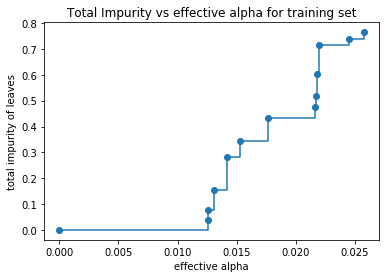

Number of nodes in the last tree is: 1 with ccp_alpha: 0.02599680587835286


ValueError: Number of features of the model must match the input. Model n_features is 170 and input n_features is 51 

In [120]:
# Post pruning 
prune_path = Single_tree.cost_complexity_pruning_path(Trained_transformed, target_train)
ccp_alphas, impurities = prune_path.ccp_alphas, prune_path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

plt.show()

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy',random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(Trained_transformed, target_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(Trained_transformed, target_train) for clf in clfs]
test_scores = [clf.score(Tested_transformed, target_test) for clf in clfs]
print(test_scores)

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [121]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

classes = ['Healthy','Infected']
colors = [ 'forestgreen','slateblue']
scatter = plt.scatter(Trained_transformed[:,0], Trained_transformed[:,1], c= target_train, cmap = mcolors.ListedColormap(colors))
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('Scaled - Age')
plt.ylabel('Scaled -Temperature')
plt.show()

ValueError: 'c' argument has 159 elements, which is not acceptable for use with 'x' with size 159, 'y' with size 159.

In [122]:
A_tree = DecisionTreeClassifier(criterion = 'entropy',random_state= 1).fit(Trained_transformed[:,[1,2]],target_train)
tree_prediction = A_tree.predict(Tested_transformed[:,[1,2]])


In [123]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf =  BaggingClassifier(DecisionTreeClassifier(), n_estimators= 300, max_samples= 0.8, bootstrap= True, n_jobs = -1 , random_state=12)
bag_classifier = bag_clf.fit(Trained_transformed[:,[1,2]], target_train )
ensemble_prediction = bag_classifier.predict(Tested_transformed[:,[1,2]])
print(accuracy_score(target_test, tree_prediction))
print(accuracy_score(target_test, ensemble_prediction))


0.525
0.525


In [124]:
# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(n_estimators= 300, max_leaf_nodes=20, n_jobs=-1 ,random_state=12)
forest_classifier = rand_clf.fit(Trained_transformed, target_train )
ensemble_prediction_forest = forest_classifier.predict(Tested_transformed)
accuracy_score(target_test, ensemble_prediction_forest)

ValueError: Number of features of the model must match the input. Model n_features is 170 and input n_features is 51 